In [1]:
from phycv import PAGE

c:\Users\sreen\AppData\Local\Programs\Python\Python310\lib\site-packages\kornia\filters\kernels.py:192: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  def get_diff_kernel3d(device=torch.device('cpu'), dtype=torch.float) -> Tensor:


In [43]:
 # PAGE parameters
mu_1 = 0
mu_2 = 0.35
sigma_1 = 0.05
sigma_2 = 0.7
S1 = 0.8
S2 = 0.8
sigma_LPF = 0.1
thresh_min = 0.0
thresh_max = 0.9
morph_flag = 1

In [54]:
import cv2 as cv
img = 'a.jpg'

In [82]:
page_cpu = PAGE(direction_bins=10)
page_edge_cpu = page_cpu.run(
        img,
        mu_1,
        mu_2,
        sigma_1,
        sigma_2,
        S1,
        S2,
        sigma_LPF,
        thresh_min,
        thresh_max,
        morph_flag,
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


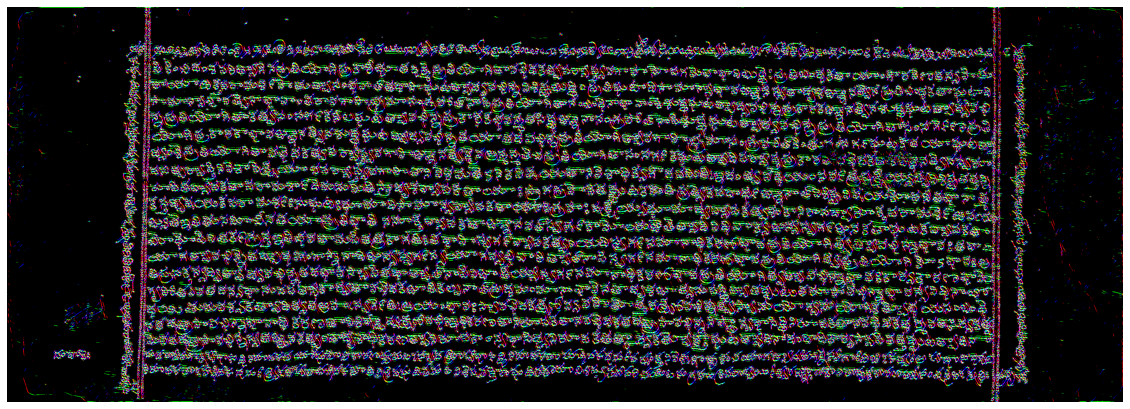

True

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB))
# plt.axis('off')
# plt.subplot(1, 2, 2)
binary = page_edge_cpu/page_edge_cpu.max()
binary[binary > 0.3] = 1
binary*=255
plt.imshow(binary)
plt.axis('off')
plt.savefig('page_cpu.png')
plt.show()

cv.imwrite('page_cpu.png', page_edge_cpu)

In [53]:
import numpy as np

print(np.unique(page_edge_cpu, return_counts=True))

(array([nan]), array([11578395], dtype=int64))


In [85]:
binary.shape

(1144, 3234, 3)

In [69]:
np.unique(binary)

array([0., 1.])

In [88]:
binary = np.transpose(binary, (2, 0, 1))
print(binary.shape)
grayBin = cv.cvtColor(binary.astype(np.uint8), cv.COLOR_BGR2GRAY)
cv.imwrite('bin.png', grayBin)

(1144, 3234, 3)


True

In [76]:

from numpy import array, sqrt, max, zeros_like, argmin,ones, stack, rot90
from scipy.signal import convolve2d, gaussian



In [77]:
"""algorithm.py"""
sobel_kernels = {
    'x': array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),
    'y': array([
                [1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]
    ])
}
gaussian_kernel = (1/16) * array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])
DIAGONAL_LEFT = np.intp(1)
DOWN = np.intp(2)
DIAGONAL_RIGHT = np.intp(3)
def apply_sobel(image: array):
        blurred = convolve2d(image, gaussian_kernel, mode='same', boundary='symm')
        grad_x = convolve2d(
            blurred, sobel_kernels['x'], mode='same', boundary='symm')
        grad_y = convolve2d(
            blurred, sobel_kernels['y'], mode='same', boundary='symm')
        grad = sqrt(grad_x * grad_x + grad_y * grad_y)
        normalised_grad = grad * (255.0 / max(grad))
        return normalised_grad

In [78]:
image = cv.imread('a.jpg', 0)

imageS = apply_sobel(image)



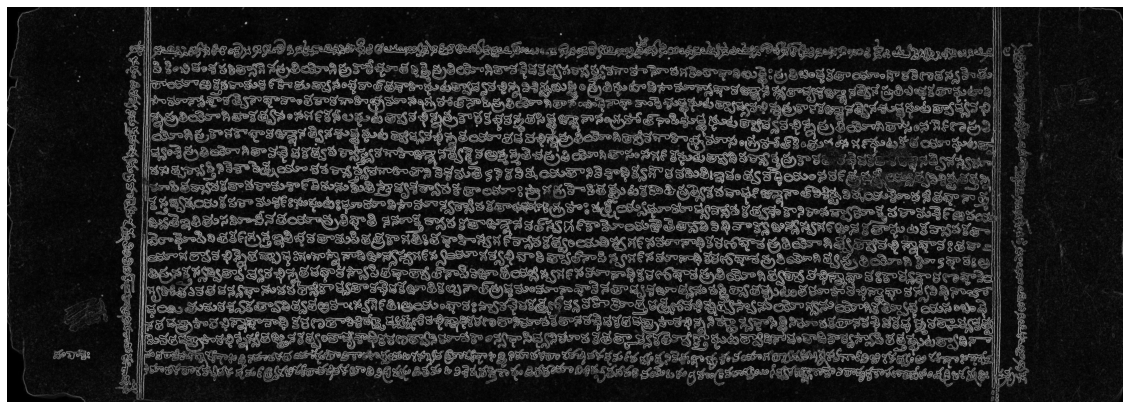

True

In [81]:
plt.figure(figsize=(20, 10))
plt.imshow(imageS, cmap='gray')
plt.axis('off')
plt.savefig('sobel.png')
plt.show()

cv.imwrite('sobel.png', imageS)